In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
data = pd.read_csv('train.csv', index_col=2)  # set the data as index column (time series)
print type(data.index.values[0])
data.index = pd.to_datetime(data.index)  # convert date to datetime index
print type(data.index.values[0])
data['StateHoliday'].replace(0, "0",inplace=True)
print type(data)
data.head()

<type 'str'>
<type 'numpy.datetime64'>
<class 'pandas.core.frame.DataFrame'>


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [92]:
date_vs_sales = data[['Sales']]  # we need to put [[]] to conserve the column name (if not [] we lose it) 

-----
           StateHoliday
2013-01-07            a
2013-01-14            0
2013-01-21            0
2013-01-28            0
2013-02-04            0


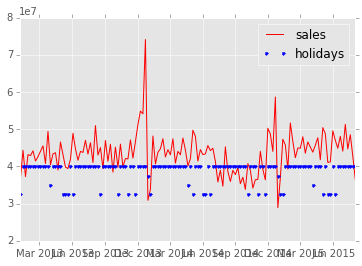

In [93]:
# show state holidays in function of date

holiday_filtred = data[['StateHoliday']]

def custom_resampler(array_like):
    if any(array_like=="c"):
        return "c"
    if any(array_like=="a"):
        return "a"
    if any(array_like=="b"):
        return "b"
    else:
        return array_like.value_counts().idxmax()
    
holiday_aggregated = holiday_filtred.resample('W-Mon', how=custom_resampler)
print '-----'
print holiday_aggregated.head()

# merge between holiday aggregated and sales aggregated
sales_aggregated = data[['Sales']].resample('W-Mon',how='sum')
sales_holiday_aggregated = holiday_aggregated.join(sales_aggregated, how='inner')
sales_holiday_aggregated = sales_holiday_aggregated.replace({'StateHoliday' : { 'a' : 32500000, 'b' : 35000000, 'c' : 37500000,'0': 40000000 }}) # change letters to values to plot them
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.Sales,fmt="r-",label='sales')
plt.plot_date(sales_holiday_aggregated.index, sales_holiday_aggregated.StateHoliday,fmt="b.",label='holidays')
plt.legend()
plt.show()
#sales_holiday_aggregated.plot()


In [116]:
# join  store and train set

def convert_month_to_number(promo_intervall):
    #pdb.set_trace()
    splited_months = promo_intervall.split(',')
    
    promo_number = [w.replace('Jan', '1').replace('Apr','4').replace('Feb', '2').replace('Mar','3').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sept','9').replace('Oct','10').replace('Nov','11').replace('Dec','12') for w in splited_months]
    
    
    #pdb.set_trace()
    return promo_number

import pdb
data = pd.read_csv('train.csv')
store_data = pd.read_csv('store.csv')
joined_data = data.merge(store_data, on='Store')
joined_data = joined_data.set_index(['Date'])
joined_data.index = pd.to_datetime(joined_data.index)
joined_data['promo2_indicator'] = 0
joined_data.tail(20)
print type(joined_data)
promo2_obs = joined_data[joined_data['Promo2']==1]
#promo2_obs = promo2_obs.set_index(['Date'])
promo2_obs.index = pd.to_datetime(promo2_obs.index)

joined_data.head(10)


#joined_data = data.join(store_data, on='Store',how='inner')

<class 'pandas.core.frame.DataFrame'>


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,promo2_indicator
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-27,1,1,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-26,1,7,0,0,0,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-25,1,6,4364,500,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-24,1,5,3706,459,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-23,1,4,3769,503,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0
2015-07-22,1,3,3464,463,1,0,0,0,c,a,1270,9,2008,0,NaN,NaN,NaN,0


In [124]:
import pdb
import numpy as np
ObsvDate = joined_data.index
year =pd.DataFrame(pd.DatetimeIndex(ObsvDate).year)
month=pd.DataFrame(pd.DatetimeIndex(ObsvDate).month)
print type(month)

joined_data['month_extracted'] = pd.DatetimeIndex(ObsvDate).month
joined_data['year_extracted'] = pd.DatetimeIndex(ObsvDate).year
dates = joined_data.index.date #.isocalendar()
print dates[0]
week_number = [ w.strftime("%W") for w in dates]
week_number = np.array(week_number)
joined_data['week_number_extracted'] = week_number
print type(joined_data['week_number_extracted']>=joined_data['CompetitionOpenSinceYear'])
print type(joined_data['Promo2']==1)
joined_data['isin'] =joined_data.apply(lambda row: str(row['month_extracted']) in str(row['PromoInterval']),axis=1)

#joined_data.loc[joined_data['Promo2']==1 & joined_data['week_number_extracted']>=joined_data['CompetitionOpenSinceYear'],'promo2_indicator']=30
joined_data.loc[((joined_data['Promo2']==1) & (joined_data['year_extracted']>joined_data['month_extracted']) & (joined_data['isin']==True ))  | ((joined_data['Promo2']==1) & (joined_data['year_extracted']==joined_data['CompetitionOpenSinceYear'])  & (joined_data['week_number_extracted'] >= joined_data['Promo2SinceWeek'] ) & (joined_data['isin']==True)),'promo2_indicator' ]= 1

#test = joined_data[joined_data['promo2_indicator']==1]
joined_data[joined_data['promo2_indicator']==1]

<class 'pandas.core.frame.DataFrame'>
2015-07-31
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,promo2_indicator,month_extracted,year_extracted,week_number_extracted,isin
2015-07-31,2,5,6064,625,1,1,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,30,True
2015-07-30,2,4,5567,601,1,1,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,30,True
2015-07-29,2,3,6402,727,1,1,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,30,True
2015-07-28,2,2,5671,646,1,1,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,30,True
2015-07-27,2,1,6627,638,1,1,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,30,True
2015-07-26,2,7,0,0,0,0,0,0,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,29,True
2015-07-25,2,6,2512,316,1,0,0,0,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,29,True
2015-07-24,2,5,3854,468,1,0,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,29,True
2015-07-23,2,4,4108,521,1,0,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,29,True
2015-07-22,2,3,5093,650,1,0,0,1,a,a,...,2007,1,13,2010,"1,4,7,10",1,7,2015,29,True


In [20]:
#joined_data = joined_data.tail(2000)
import time
i = 0
t_start = time.time()
row_iterator = joined_data.iterrows()
for row in row_iterator:
   
    #pdb.set_trace()
    if row[1]['Promo2'] == 1:    # if promo_2 exists
        
        date = row[0]     # select the year and the month from the date
        obs_year = date.strftime("%Y")
        obs_week_number = date.strftime("%W")
        obs_month_number = date.strftime("%m")
        year_start_promo = row[1]['Promo2SinceYear']
        week_start_promo = row[1]['Promo2SinceWeek']
        PromoInterval = row[1]['PromoInterval']
        month_promo = convert_month_to_number(PromoInterval)
        if (obs_year > year_start_promo):
            # add promo2 indicator 1
            if obs_month_number in month_promo:
               
                #joined_data.loc[row[0], 'promo2_indicator'] = 1
                #pdb.set_trace()
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  1
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 1
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 1
            else:
                
                #joined_data.loc[row[0], 'promo2_indicator'] = 0
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] = 0
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        elif (obs_year == year_start_promo):
            if (obs_week_number >= week_start_promo):
                # add promo2 indicator 1
                if obs_month_number in month_promo:
                    
                    #joined_data.loc[row[0], 'promo2_indicator'] = 1
                    #pdb.set_trace()
                    #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  1
                    #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 1
                    joined_data.loc[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 1
                else:
                    
                    #joined_data.loc[row[0], 'promo2_indicator'] = 0
                    #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
                    #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                    joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
            else:
                
                # add promo2 indicator 0
                #joined_data.loc[row[0], 'promo2_indicator'] = 0
                #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
                #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
                joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        else:
            
            # add promo2 indicator 0
            #joined_data.loc[row[0], 'promo2_indicator'] = 0
            #joined_data.loc[row[0] and joined_data.Store==row[1][0], 'promo2_indicator'] =  0
            #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0 
            joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
    if row[1]['Promo2'] == 0:
        # add promo2 indicator 0 
        #pdb.set_trace()
        #row[1].ix[17]=0
        #joined_data[joined_data['Store']== row[1][0]
        #joined_data.loc[joined_data.Store==row[1][0]].loc[row[0],'promo2_indicator'] = 0
        joined_data.ix[(joined_data.index==row[0]) & (joined_data.Store==row[1][0]), 'promo2_indicator'] = 0
        

t_end = time.time()
elapsed_time = t_start - t_end
print 'elapsed time is ' + str(elapsed_time) 
joined_data['2015-06-30']


KeyboardInterrupt: 

In [36]:
#joined_data = joined_data.tail(2000)
import time
t_start = time.time()

i = 0
joined_data['dup_date'] = joined_data.index
promo2_obs['dup_date'] = promo2_obs.index
def calculate(s):
    #pdb.set_trace()
    global i
    date = s['dup_date']
    if s['Promo2'] == 1:    # if promo_2 exists
        
        date = s['dup_date']     # select the year and the month from the date
        obs_year = date.strftime("%Y")
        obs_week_number = date.strftime("%W")
        obs_month_number = date.strftime("%m")
        year_start_promo = s['Promo2SinceYear']
        week_start_promo = s['Promo2SinceWeek']
        PromoInterval = s['PromoInterval']
        month_promo = convert_month_to_number(PromoInterval)
        if (obs_year > year_start_promo):
            # add promo2 indicator 1
            if obs_month_number in month_promo:

                joined_data.ix[(joined_data.index==date) & (joined_data.Store==s['Store']), 'promo2_indicator'] = 1
                
        elif (obs_year == year_start_promo):
            if (obs_week_number >= week_start_promo):
                # add promo2 indicator 1
                if obs_month_number in month_promo:
                    joined_data.ix[(joined_data.index==date) & (joined_data.Store==s['Store']), 'promo2_indicator'] = 1
                    
        

#joined_data.applymap(calculate, axis=1)
promo2_obs.apply(calculate, axis=1)
#t_end = time.time()
#elapsed_time = t_start - t_end
#print 'elapsed time is pri ' + str(elapsed_time) 
promo2_obs['2015-06-30']


/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [33]:
t_start = time.time()
t_end = time.time()
elapsed_time = t_end - t_start
print 'elapsed time is ' + str(elapsed_time) 


elapsed time is 8.29696655273e-05


In [4]:

def sales_of_date(date):
    date_sales = pd.DataFrame(date_vs_sales.ix[date])   #example '2015-07-31' and pass time series
    total_daily_sales = date_sales.sum()
    stores_sailing = date_vs_sales.size
    return (date_sales,stores_sailing,total_daily_sales)

date_sale,stores_sailing,total_daily_sales = sales_of_date('2015-07-31')
print stores_sailing
print total_daily_sales

1017209
Sales    10109742
dtype: int64


In [5]:
# repartition of train set between the national holidays and normal days

data = pd.read_csv('train.csv', index_col=2)  # set the data as index column (time series)
data.index = pd.to_datetime(data.index)  # conve

normal_sales = data[data['StateHoliday'].isin(["0",0])]
a_sales = data[data['StateHoliday']=='a']
b_sales = data[data['StateHoliday']=='b']
c_sales = data[data['StateHoliday']=='c']
#rest_sales = data[~data['StateHoliday'].isin([0,"0","a","b","c"])]
#print "len rest sales is: %f" %len(rest_sales)
print "normal sales observations are: %s public holiday observations are: %s Easter holiday observations are: %s Christmas observations are: %s " %(len(normal_sales),len(a_sales),len(b_sales),len(c_sales))




normal sales observations are: 986159 public holiday observations are: 20260 Easter holiday observations are: 6690 Christmas observations are: 4100 


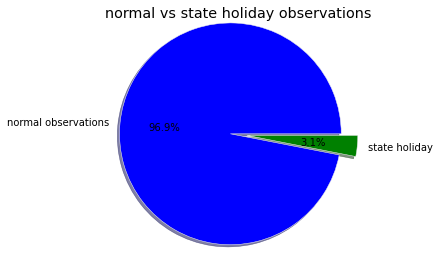

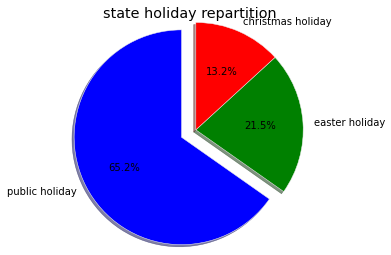

In [6]:
name = ['normal observations','state holiday']
data_plot = [len(normal_sales),len(a_sales)+len(b_sales)+len(c_sales)]

explode=(0.15, 0)
plt.pie(data_plot, explode=explode, labels=name, autopct='%1.1f%%', startangle=0, shadow=True)
plt.axis('equal')
plt.title('normal vs state holiday observations')
plt.show()

name = ['public holiday ', 'easter holiday', 'christmas holiday']
data_plot = [a_sales.size,b_sales.size,c_sales.size]
explode=(0.15, 0,0)
plt.pie(data_plot, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('state holiday repartition')
plt.show()

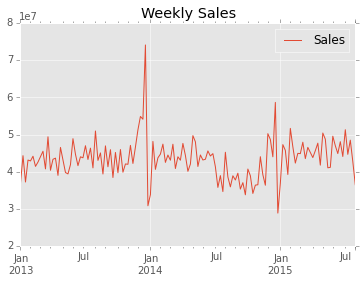

,Sales
2013-01-07,36956183
2013-01-14,44335162
2013-01-21,37252051
2013-01-28,43157797
2013-02-04,42920978


In [7]:
# plot weekly sales

date_vs_sales_aggregated = date_vs_sales.resample('W-MON',how='sum')
date_vs_sales_aggregated.plot()
plt.title("Weekly Sales")
plt.show()
date_vs_sales_aggregated.head()


the week aggregation is defined by the aggregation of observations starting from the week before the displayed week until the displayed week

In [8]:
# construct promo_2 observations

stores_data = pd.read_csv('store.csv')  # set the data as index column (time series)
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [9]:
# select rows that have promo 2
#import re
import datetime
stores_data_promo_2 = stores_data[stores_data['Promo2']==1]

stores_data_promo_2['Promo2SinceWeek'] = stores_data_promo_2['Promo2SinceWeek'].astype(str)
print stores_data_promo_2['Promo2SinceWeek'][1]

def func(array_like):
    if len(array_like)==3:
        array_like = "0"+array_like
        return array_like
    else:
        return array_like
        
stores_data_promo_2['Promo2SinceWeek'] = stores_data_promo_2['Promo2SinceWeek'].apply(func)

stores_data_promo_2['start_promo'] = stores_data_promo_2.Promo2SinceYear.map(str) + "-W"+stores_data_promo_2.Promo2SinceWeek.map(str)+'-1'     

stores_data_promo_2['start_promo'].replace(to_replace='(\.)(0)',value='',inplace=True,regex=True)
print stores_data_promo_2.start_promo.values[0]
stores_data_promo_2.start_promo = pd.to_datetime(stores_data_promo_2.start_promo, format="%Y-W%W-%w")   #Y:year,W:week number,w:week day of the week(monday)
print type(stores_data_promo_2.start_promo.values[0])
stores_data_promo_2.head()


/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khalil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pyd

13.0
2010-W13-1
<type 'numpy.datetime64'>


/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/khalil/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_promo
1,2,a,a,570,11,2007,1,13.0,2010,"Jan,Apr,Jul,Oct",2010-03-29
2,3,a,a,14130,12,2006,1,14.0,2011,"Jan,Apr,Jul,Oct",2011-04-04
10,11,a,c,960,11,2011,1,01.0,2012,"Jan,Apr,Jul,Oct",2012-01-02
11,12,a,c,1070,NaN,NaN,1,13.0,2010,"Jan,Apr,Jul,Oct",2010-03-29
12,13,d,a,310,NaN,NaN,1,45.0,2009,"Feb,May,Aug,Nov",2009-11-09


In [23]:
# construct the promo days per store
import pdb
import numpy as np
def PromoInterval_func(array_like):
    #pdb.set_trace()
    splited_months = array_like.split(',')
    
    words = [w.replace('Jan', '01').replace('Apr','04').replace('Feb', '02').replace('Mar','03').replace('May','05').replace('Jun','06').replace('Jul','07').replace('Aug','08').replace('Sept','09').replace('Oct','10').replace('Nov','11').replace('Dec','12') for w in splited_months]
    
    
    #pdb.set_trace()
    return words
    
PromoInterval_splitted = stores_data_promo_2.PromoInterval.apply(PromoInterval_func)
print PromoInterval_splitted





1       [01, 04, 07, 10]
2       [01, 04, 07, 10]
10      [01, 04, 07, 10]
11      [01, 04, 07, 10]
12      [02, 05, 08, 11]
13      [01, 04, 07, 10]
14      [01, 04, 07, 10]
16      [01, 04, 07, 10]
17      [01, 04, 07, 10]
18      [03, 06, 09, 12]
19      [01, 04, 07, 10]
20      [01, 04, 07, 10]
21      [01, 04, 07, 10]
23      [01, 04, 07, 10]
26      [01, 04, 07, 10]
27      [03, 06, 09, 12]
29      [03, 06, 09, 12]
31      [02, 05, 08, 11]
34      [01, 04, 07, 10]
35      [01, 04, 07, 10]
38      [02, 05, 08, 11]
39      [02, 05, 08, 11]
40      [01, 04, 07, 10]
41      [01, 04, 07, 10]
42      [01, 04, 07, 10]
45      [01, 04, 07, 10]
46      [01, 04, 07, 10]
50      [01, 04, 07, 10]
51      [01, 04, 07, 10]
53      [02, 05, 08, 11]
              ...       
1068    [01, 04, 07, 10]
1070    [03, 06, 09, 12]
1071    [02, 05, 08, 11]
1072    [01, 04, 07, 10]
1073    [01, 04, 07, 10]
1075    [01, 04, 07, 10]
1076    [03, 06, 09, 12]
1077    [01, 04, 07, 10]
1078    [01, 04, 07, 10]
